In [1]:
# importing packages. See https://github.com/BasisResearch/collab-creatures for repo setup
import logging
import os
import random
import time

import numpy as np
import pyro
from IPython.display import HTML

import collab2.foraging.toolkit as ft
from collab2.foraging import random_hungry_followers as rhf
from collab2.foraging.toolkit import animate_predictors, plot_predictor
from collab2.utils import find_repo_root

root = find_repo_root()
logging.basicConfig(format="%(message)s", level=logging.INFO)

# users can ignore smoke_test -- it's for automatic testing on GitHub, to make sure the notebook runs on future updates to the repository
smoke_test = "CI" in os.environ
# smoke_test = True
num_frames = 5 if smoke_test else 50
num_svi_iters = 10 if smoke_test else 1000
num_samples = 10 if smoke_test else 1000

notebook_starts = time.time()

NameError: name 'find_repo_root' is not defined

In [2]:
random.seed(23)
np.random.seed(23)

random_foragers_sim = rhf.RandomForagers(
    grid_size=40,
    probabilities=[1, 2, 3, 2, 1, 2, 3, 2, 1],
    num_foragers=3,
    num_frames=num_frames,
    num_rewards=15,
    grab_range=3,
)

# run a particular simulation with these parameters
random_foragers_sim()

# the results of the simulation are stored in `random_foragers_sim.foragersDF`.
# each row contains the x and y coordinates of a forager at a particular time

random_foragers_sim.foragersDF.head()

x     y  time  forager    type
0  20.0  23.0     0        0  random
1  24.0  23.0     1        0  random
2  26.0  25.0     2        0  random
3  24.0  28.0     3        0  random
4  22.0  26.0     4        0  random

In [3]:
print(random_foragers_sim.grid_size)


local_windows_kwargs = {
    "window_size": 10,
    "sampling_fraction": 1,
    "skip_incomplete_frames": False,
}

predictor_kwargs = {
    "proximity": {
        "interaction_length": random_foragers_sim.grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": {},
        "repulsion_radius": 1.5,
        "optimal_distance": 4,
        "proximity_decay": 1,
    },
    "food": {
        "decay_factor": 0.5,
    },
    "access": {
        "decay_factor": 0.2,
    },
}

score_kwargs = {
    "nextStep_linear": {"nonlinearity_exponent": 1},
    "nextStep_sublinear": {"nonlinearity_exponent": 0.5},
}

derivedDF_random = ft.derive_predictors_and_scores(
    random_foragers_sim,
    local_windows_kwargs,
    predictor_kwargs=predictor_kwargs,
    score_kwargs=score_kwargs,
    dropna=True,
    add_scaled_values=True,
)

display(derivedDF_random.head())

40


2024-09-19 10:05:33,205:  proximity completed in 0.67 seconds.
2024-09-19 10:05:33,891:  food completed in 0.69 seconds.
2024-09-19 10:05:34,144:  access completed in 0.25 seconds.
2024-09-19 10:05:34,445:  nextStep_linear completed in 0.30 seconds.
2024-09-19 10:05:34,632:  nextStep_sublinear completed in 0.19 seconds.
/home/rafal/s78projects/collab-creatures/collab2/foraging/toolkit/derive.py:56: UserWarning: 
                      Dropped 903/44578 frames from `derivedDF` due to NaN values.
                      Missing values can arise when computations depend on next/previous step positions
                      that are unavailable. See documentation of the corresponding predictor/score generating
                      functions for more information.
                      
  warnings.warn(


x   y  distance_to_forager  time  forager  proximity      food    access  \
0  10  23            10.000000     0        0   0.047853  0.211446  0.135335   
1  11  19             9.848858     0        0   0.123592  0.269768  0.139489   
2  11  20             9.486833     0        0   0.157399  0.255077  0.149963   
3  11  21             9.219544     0        0   0.171165  0.242907  0.158198   
4  11  22             9.055385     0        0   0.157952  0.240538  0.163478   

   distance_to_next_step  nextStep_linear  nextStep_sublinear  \
0              14.000000         0.000000            0.000000   
1              13.601471         0.028466            0.014336   
2              13.341664         0.047024            0.023795   
3              13.152946         0.060504            0.030724   
4              13.038405         0.068685            0.034954   

   proximity_scaled  food_scaled  access_scaled  nextStep_linear_scaled  \
0          0.523927     0.211410       0.000000                0.000000   
1          0.561796     0.269734       0.004804                0.028466   
2          0.578699     0.255043       0.016917                0.047024   
3          0.585583     0.242872       0.026441                0.060504   
4          0.578976     0.240503       0.032548                0.068685   

   nextStep_sublinear_scaled  
0                   0.000000  
1                   0.014336  
2                   0.023795  
3                   0.030724  
4                   0.034954

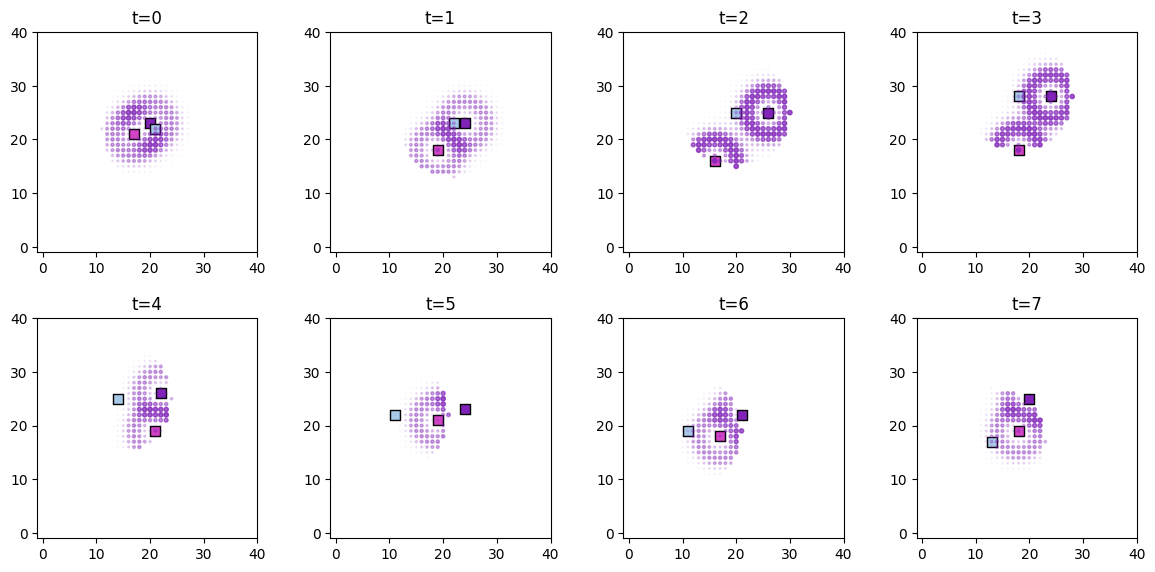

In [4]:
plot_predictor(
    random_foragers_sim.foragers,
    random_foragers_sim.derived_quantities["proximity"],
    predictor_name="proximity",
    time=range(min(8, num_frames)),
    grid_size=40,
    size_multiplier=10,
    random_state=99,
    forager_position_indices=[0, 1, 2],
    forager_predictor_indices=[1],
)

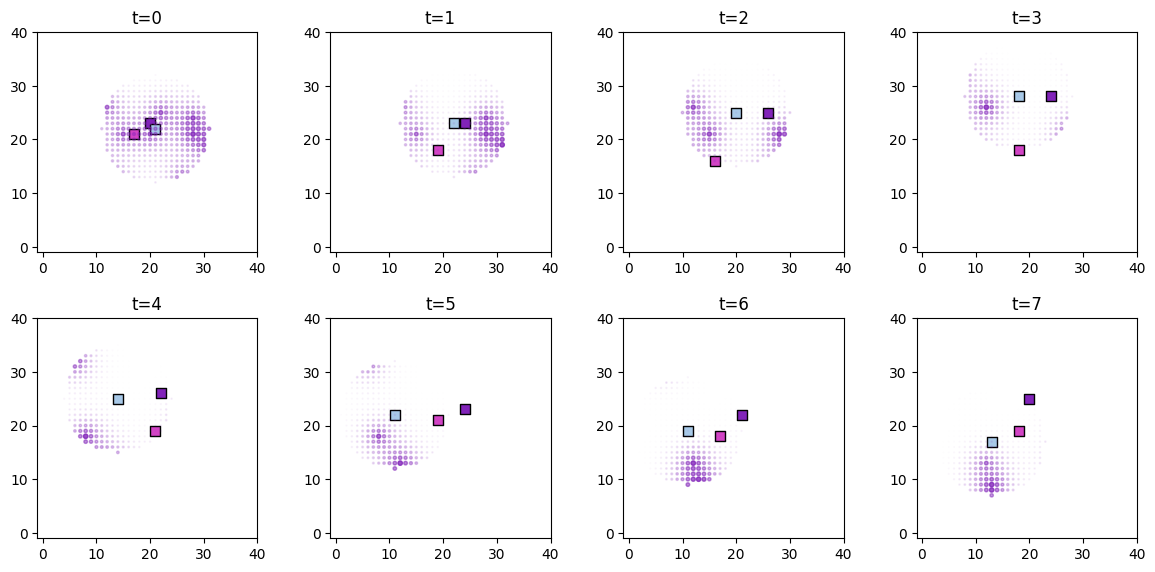

In [5]:
plot_predictor(
    random_foragers_sim.foragers,
    random_foragers_sim.derived_quantities["food"],
    predictor_name="food",
    time=range(min(8, num_frames)),
    grid_size=40,
    size_multiplier=10,
    random_state=99,
    forager_position_indices=[0, 1, 2],
    forager_predictor_indices=[1],
)

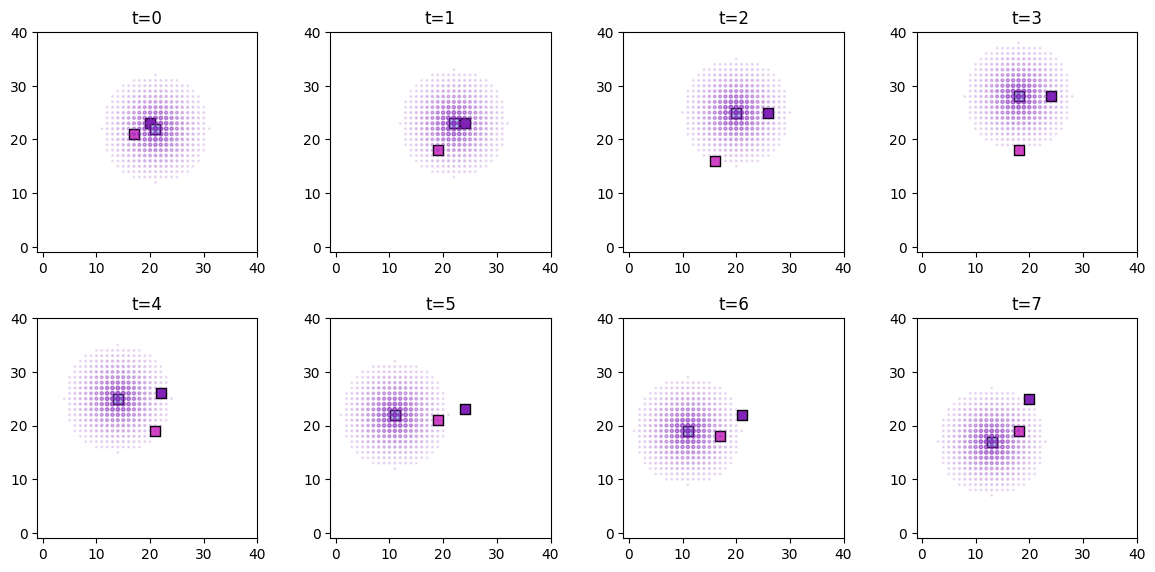

In [6]:
plot_predictor(
    random_foragers_sim.foragers,
    random_foragers_sim.derived_quantities["access"],
    predictor_name="access",
    time=range(min(8, num_frames)),
    grid_size=40,
    size_multiplier=10,
    random_state=99,
    forager_position_indices=[0, 1, 2],
    forager_predictor_indices=[1],
)

2024-09-19 10:05:38,790:  Animation.save using <class 'matplotlib.animation.HTMLWriter'>


50


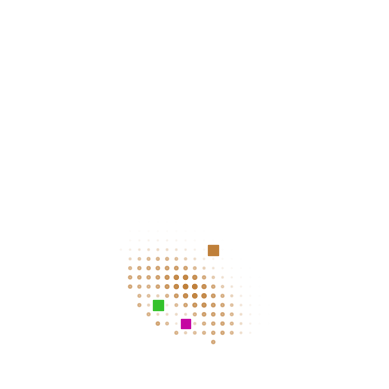

In [7]:
ani = animate_predictors(
    random_foragers_sim.foragersDF,
    random_foragers_sim.derived_quantities["proximity"],
    predictor_name="proximity",
    forager_position_indices=[0, 1, 2],
    forager_predictor_indices=[1],
    grid_size=40,
    random_state=10,
    size_multiplier=10,
)
HTML(ani.to_jshtml())

2024-09-19 10:05:40,470:  Animation.save using <class 'matplotlib.animation.HTMLWriter'>


50


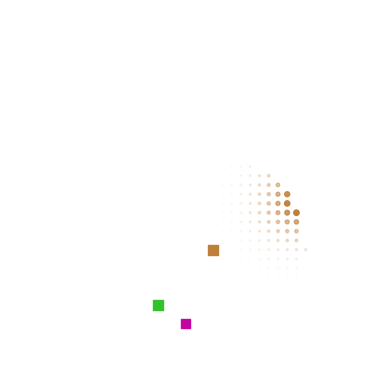

In [8]:
ani = animate_predictors(
    random_foragers_sim.foragersDF,
    random_foragers_sim.derived_quantities["food"],
    predictor_name="food",
    forager_position_indices=[0, 1, 2],
    forager_predictor_indices=[1],
    grid_size=40,
    random_state=10,
    size_multiplier=15,
)
HTML(ani.to_jshtml())

In [9]:
predictors = ["proximity_scaled", "food_scaled", "access_scaled"]
outcome_vars = ["nextStep_sublinear"]


predictor_tensors_random, outcome_tensor_random = ft.prep_data_for_inference(
    random_foragers_sim, predictors, outcome_vars
)

In [11]:
# plot outcome vs predictors
ft.visualise_forager_predictors(
    predictors=[
        predictor_tensors_random["proximity_scaled"],
        predictor_tensors_random["food_scaled"],
        predictor_tensors_random["access_scaled"],
    ],
    predictor_names=["proximity_scaled", "food_scaled", "access_scaled"],
    outcome_name="nextStep_sublinear",
    outcome=outcome_tensor_random["nextStep_sublinear"],
    sampling_rate=0.5,
)

/home/rafal/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning:

Can't initialize NVML



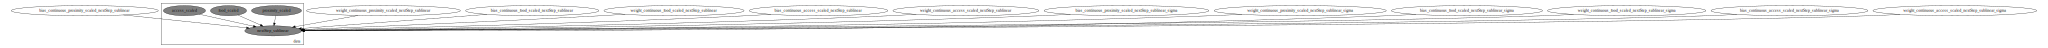

In [12]:
model_sigmavar_random = ft.HeteroskedasticLinear(
    predictor_tensors_random, outcome_tensor_random
)
pyro.render_model(
    model_sigmavar_random,
    model_args=(predictor_tensors_random, outcome_tensor_random),
    render_deterministic=True,
)

2024-09-19 10:06:30,290:  Starting SVI inference with 1500 iterations.


[iteration 0001] loss: 158967.3750
[iteration 0050] loss: 111156.0781
[iteration 0100] loss: 105351.2109
[iteration 0150] loss: 105024.7656
[iteration 0200] loss: 105410.1953
[iteration 0250] loss: 103268.7969
[iteration 0300] loss: 105628.3984
[iteration 0350] loss: 103466.2188
[iteration 0400] loss: 102938.1797
[iteration 0450] loss: 102938.1641
[iteration 0500] loss: 102574.5078
[iteration 0550] loss: 103109.7109
[iteration 0600] loss: 103578.5000
[iteration 0650] loss: 102578.0938
[iteration 0700] loss: 102598.2891
[iteration 0750] loss: 102736.3281
[iteration 0800] loss: 102788.7109
[iteration 0850] loss: 102590.0781
[iteration 0900] loss: 102785.3438
[iteration 0950] loss: 102683.3516
[iteration 1000] loss: 102584.4609
[iteration 1050] loss: 102856.4844
[iteration 1100] loss: 102490.0156
[iteration 1150] loss: 102739.1016
[iteration 1200] loss: 102576.7188
[iteration 1250] loss: 104148.7578
[iteration 1300] loss: 102474.4062
[iteration 1350] loss: 102712.1484
[iteration 1400] los

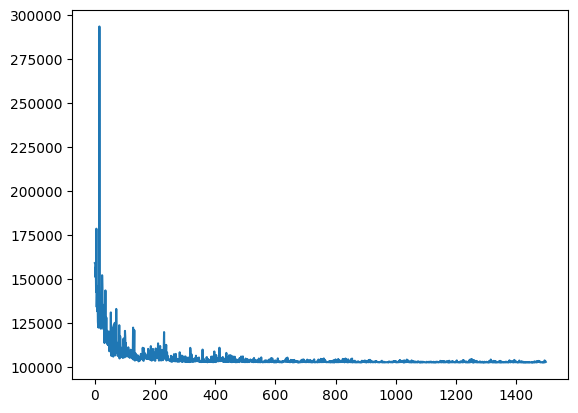

2024-09-19 10:06:51,323:  SVI inference completed in 21.03 seconds.


dict_keys(['bias_continuous_proximity_scaled_nextStep_sublinear', 'weight_continuous_proximity_scaled_nextStep_sublinear', 'bias_continuous_food_scaled_nextStep_sublinear', 'weight_continuous_food_scaled_nextStep_sublinear', 'bias_continuous_access_scaled_nextStep_sublinear', 'weight_continuous_access_scaled_nextStep_sublinear', 'bias_continuous_proximity_scaled_nextStep_sublinear_sigma', 'weight_continuous_proximity_scaled_nextStep_sublinear_sigma', 'bias_continuous_food_scaled_nextStep_sublinear_sigma', 'weight_continuous_food_scaled_nextStep_sublinear_sigma', 'bias_continuous_access_scaled_nextStep_sublinear_sigma', 'weight_continuous_access_scaled_nextStep_sublinear_sigma', 'proximity_scaled', 'food_scaled', 'access_scaled', 'nextStep_sublinear'])
['weight_continuous_proximity_scaled_nextStep_sublinear', 'weight_continuous_food_scaled_nextStep_sublinear', 'weight_continuous_access_scaled_nextStep_sublinear']
Coefficient marginals:
Site: weight_continuous_proximity_scaled_nextStep_s

In [13]:
results_random = ft.get_samples(
    model=model_sigmavar_random,
    predictors=predictor_tensors_random,
    outcome=outcome_tensor_random,
    num_svi_iters=1500,
    num_samples=1000,
)

In [14]:
selected_sites = [
    key
    for key in results_random["samples"].keys()
    if key.startswith("weight") and not key.endswith("sigma")
]
selected_samples = {key: results_random["samples"][key] for key in selected_sites}

ft.plot_coefs(
    selected_samples, "Random foragers", nbins=120, ann_start_y=160, ann_break_y=50
)

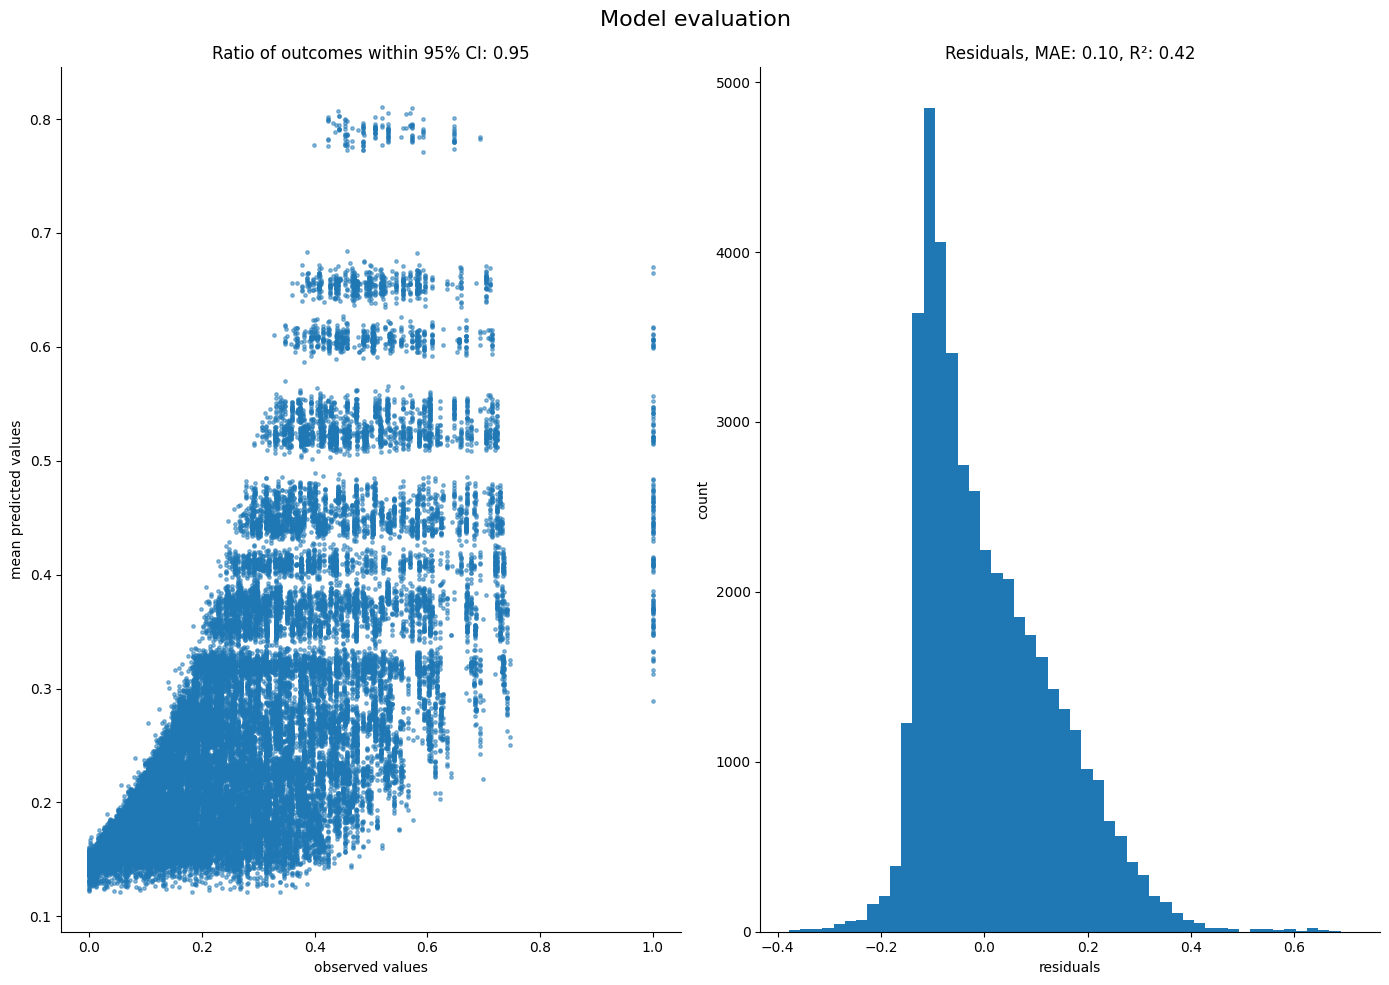

In [15]:
ft.evaluate_performance(
    model=model_sigmavar_random,
    guide=results_random["guide"],
    predictors=predictor_tensors_random,
    outcome=outcome_tensor_random,
    num_samples=1000,
)